In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

In [6]:
#创建200个随机数
x_data = np.linspace(-2,2,200)[:,np.newaxis]
#创建噪音数据，形状和x_data一致
nosie = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + nosie

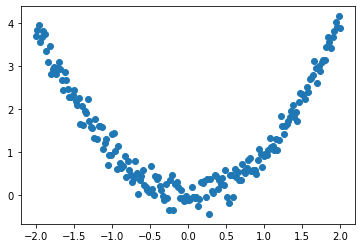

In [7]:
plt.scatter(x_data,y_data)
plt.show()

In [8]:
# 把numpy数据转换成 tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [9]:
# 构建神经网络模型
class NonLinearRegression(nn.Module):
    def __init__(self):
        super(NonLinearRegression,self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,1)
    
    #定义网络计算
    def forward(self,x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [10]:
# 定义模型
model = NonLinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(),lr=0.3)

In [11]:
for name,parameters in model.named_parameters():
    print("name:{},parm:{}".format(name,parameters))

name:fc1.weight,parm:Parameter containing:
tensor([[ 0.5304],
        [ 0.0467],
        [ 0.5559],
        [-0.2300],
        [-0.2953],
        [-0.4734],
        [ 0.1125],
        [-0.9720],
        [-0.1323],
        [-0.6957]], requires_grad=True)
name:fc1.bias,parm:Parameter containing:
tensor([-0.3930,  0.9884, -0.5635,  0.7181, -0.3024,  0.4732, -0.3080,  0.7433,
         0.7773,  0.9588], requires_grad=True)
name:fc2.weight,parm:Parameter containing:
tensor([[-0.1742,  0.2241, -0.0520,  0.2701,  0.1178, -0.2801,  0.2115,  0.1022,
          0.1756, -0.1149]], requires_grad=True)
name:fc2.bias,parm:Parameter containing:
tensor([0.0401], requires_grad=True)


In [12]:
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out,target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200==0:
        print(i,loss.item())

0 2.557589054107666
200 0.15273652970790863
400 0.0750286877155304
600 0.07509291917085648
800 0.06641514599323273
1000 0.06378678232431412
1200 0.0626164972782135
1400 0.061991170048713684
1600 0.0616515576839447
1800 0.06143888086080551
2000 0.06128882244229317


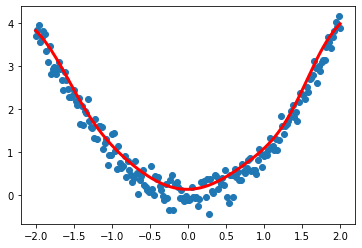

In [13]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()